# Introduction
In the [Intro to SQL micro-course](https://www.kaggle.com/learn/intro-to-sql) , you learned how to use **INNER JOIN** to consolidate information from two different tables. Now you'll learn about a few more types of **JOIN**, along with how to use **UNIONs** to pull information from multiple tables.

Along the way, we'll work with two imaginary tables, called `owners` and `pets`.
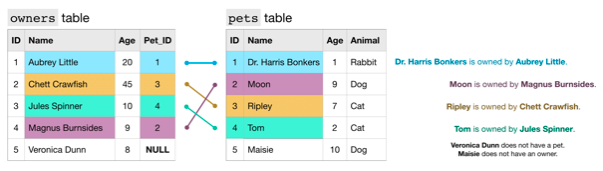

Each row of the `owners` table identifies a different pet owner, where the ID column is a unique identifier. The Pet_ID column (in the owners table) contains the ID for the pet that belongs to the owner (this number matches the ID for the pet from the pets table).

For example,

the `pets` table shows that Dr. Harris Bonkers is the pet with `ID` 1.
The `owners` table shows that Aubrey Little is the owner of the pet with `ID` 1.
Putting these two facts together, Dr. Harris Bonkers is owned by Aubrey Little. Likewise, since Veronica Dunn does not have a corresponding `Pet_ID`, she does not have a pet. And, since 5 does not appear in the `Pet_ID` column, Maisie does not have an owner.

# JOINs
Recall that we can use an **INNER JOIN** to pull rows from both tables where the value in the `Pet_ID` column in the owners table has a match in the `ID` column of the pets table.
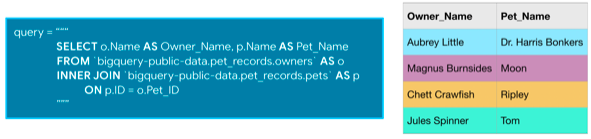
In this case, Veronica Dunn and Maisie are not included in the results. But what if we instead want to create a table containing all pets, regardless of whether they have owners? Or, what if we want to combine all of the rows in both tables? In these cases, we need only use a different type of **JOIN**.

For instance, to create a table containing all rows from the owners table, we use a **LEFT JOIN**. In this case, "left" refers to the table that appears before the **JOIN** in the query. ("Right" refers to the table that is after the JOIN.)


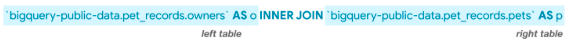
Replacing **INNER JOIN** in the query above with **LEFT JOIN** returns all rows where the two tables have matching entries, along with all of the rows in the left table (whether there is a match or not).

If we instead use a **RIGHT JOIN**, we get the matching rows, along with all rows in the right table (whether there is a match or not).

Finally, a **FULL JOIN** returns all rows from both tables. Note that in general, any row that does not have a match in both tables will have NULL entries for the missing values. You can see this in the image below.

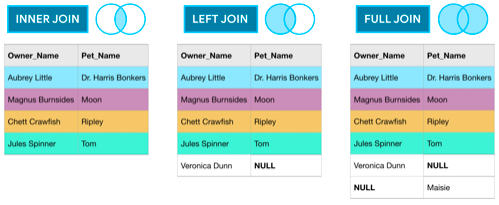

# UNIONs
As you've seen, **JOINs** horizontally combine results from different tables. If you instead would like to vertically concatenate columns, you can do so with a **UNION**. The example query below combines the Age columns from both tables.

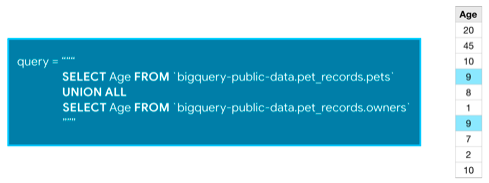

Note that with a **UNION**, the data types of both columns must be the same, but the column names can be different. (So, for instance, we cannot take the **UNION** of the Age column from the owners table and the `Pet_Name` column from the `pets` table.)

We use **UNION ALL** to include duplicate values - you'll notice that 9 appears in both the `owners` table and the `pets` table, and shows up twice in the concatenated results. If you'd like to drop duplicate values, you need only change **UNION ALL** in the query to **UNION DISTINCT**.

# Example
We'll work with the `Hacker News` dataset. We begin by reviewing the first several rows of the `comments` table. 

In [1]:
from google.cloud import bigquery

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/macbookpro/Documents/5. Kaggle/3. SQL/orbital-caldron-272723-ed30f065fd90.json"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table
table_ref = dataset_ref.table("comments")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


You'll also work with the `stories` table.

In [2]:
# Construct a reference to the "stories" table
table_ref = dataset_ref.table("stories")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6940813,sarath237,0,1387536270,2013-12-20 10:44:30+00:00,Sheryl Brindo Hot Pics,http://www.youtube.com/watch?v=ym1cyxneB0Y,Sheryl Brindo Hot Pics,None,True,NaN,sarath237
1,6991401,123123321321,0,1388508751,2013-12-31 16:52:31+00:00,Are you people also put off by the culture of ...,,They&#x27;re pretty explicitly &#x27;startup f...,None,True,NaN,123123321321
2,1531556,ssn,0,1279617234,2010-07-20 09:13:54+00:00,New UI for Google Image Search,http://googlesystem.blogspot.com/2010/07/googl...,Again following on Bing's lead.,None,None,0.0,ssn
3,5012398,hoju,0,1357387877,2013-01-05 12:11:17+00:00,Historic website screenshots,http://webscraping.com/blog/Generate-website-s...,Python script to generate historic screenshots...,None,None,0.0,hoju
4,7214182,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0.0,kogir


Since you are already familiar with **JOINs** from the Intro to SQL micro-course, we'll work with a relatively complex example of a **JOIN** that uses a [common table expression (CTE)](https://www.kaggle.com/dansbecker/as-with).

The query below pulls information from the `stories` and `comments` tables to create a table showing all stories posted on January 1, 2012, along with the corresponding number of comments. We use a **LEFT JOIN** so that the results include stories that didn't receive any comments.

In [5]:
# Query to select all stories posted on January 1, 2012, with number of comments
join_query = """
             WITH c AS
             (
             SELECT parent, COUNT(*) as num_comments
             FROM `bigquery-public-data.hacker_news.comments` 
             GROUP BY parent
             )
             SELECT s.id as story_id, s.by, s.title, c.num_comments
             FROM `bigquery-public-data.hacker_news.stories` AS s
             LEFT JOIN c
             ON s.id = c.parent
             WHERE EXTRACT(DATE FROM s.time_ts) = '2012-01-01'
             ORDER BY c.num_comments DESC
             """

# Run the query, and return a pandas DataFrame
join_result = client.query(join_query).result().to_dataframe()
join_result.head()

,story_id,by,title,num_comments
0,3412900,whoishiring,Ask HN: Who is Hiring? (January 2012),154.0
1,3412901,whoishiring,Ask HN: Freelancer? Seeking freelancer? (Janua...,97.0
2,3412643,jemeshsu,Avoid Apress,30.0
3,3412891,Brajeshwar,"There's no shame in code that is simply ""good ...",27.0
4,3414012,ramanujam,Impress.js - a Prezi like implementation using...,27.0


Since the results are ordered by the `num_comments` column, stories without comments appear at the end of the DataFrame. (Remember that NaN stands for "not a number".)

In [4]:
# None of these stories received any comments
join_result.tail()

,story_id,by,title,num_comments
439,3414088,epo,Kaufmann's wonderful Posographe (an analog mec...,NaN
440,3412894,FluidDjango,ADHD pill shortage pits agencies against each ...,NaN
441,3413962,ubershmekel,"Precision, recall, sensitivity and specificity",NaN
442,3413999,semerda,Get your $$ to Silicon Valley,NaN
443,3414103,tokenadult,Slow Intelligence: Ways to slow down and think...,NaN


Next, we write a query to select all usernames corresponding to users who wrote **stories or comments** on January 1, 2014. We use **UNION DISTINCT** (instead of **UNION ALL**) to ensure that each user appears in the table at most once.

In [6]:
# Query to select all users who posted stories or comments on January 1, 2014
union_query = """
              SELECT c.by
              FROM `bigquery-public-data.hacker_news.comments` AS c
              WHERE EXTRACT(DATE FROM c.time_ts) = '2014-01-01'
              UNION DISTINCT
              SELECT s.by
              FROM `bigquery-public-data.hacker_news.stories` AS s
              WHERE EXTRACT(DATE FROM s.time_ts) = '2014-01-01'
              """

# Run the query, and return a pandas DataFrame
union_result = client.query(union_query).result().to_dataframe()
union_result.head()

,by
0,logjam
1,seszett
2,k-mcgrady
3,voltagex_
4,cenhyperion


To get the number of users who posted on January 1, 2014, we need only take the length of the DataFrame.

In [7]:
# Number of users who posted stories or comments on January 1, 2014
len(union_result)

2282